# Linear Regression from scratch with 3 Training Techniques
*This notebook was created on 27/08/2021*
- In this notebook, I defined a Linear Regression Object (Class) from scratch (without using any predefined model from any library like scikit-learn, tensorflow or keras).
- I built this based on what I remember from the **Logistic Regresisson Model from Scratch** I learnt from Mr.Andrew Ng on Coursera.

## Import Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Make an artificial dataset

In [2]:
# Define expected Function
X = 3 * np.random.rand(100, 1)
y = 3 + 5 * X + np.random.randn(100, 1)

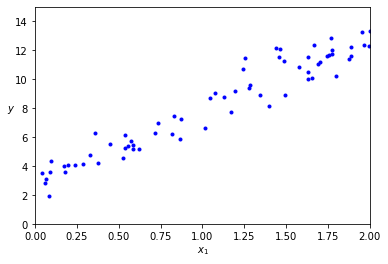

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

## Model Definition

In [80]:
class MyLinearModel:
    def __init__(self, dims, learning_rate=0.05, n_estimators=100, batch_size=-1):
        self.dims = dims
        self.params = self.initial_parameters(self.dims)
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.batch_size = batch_size
    
    def initial_parameters(self, dims):
        np.random.seed(42)
        dims = dims + [1]
        params = {}
        for i in range(1, len(dims)):
            params['W'] = np.random.rand(dims[i], dims[i-1])
            params['b'] = np.zeros((dims[i], dims[i-1]))
        return params
    
    def forward_propagation(self, X):
        params = self.params
        y_hat = np.dot(X, params['W']) + params['b']
        return y_hat
    
    def backward_propagation(self, X, y, y_hat):
        grads = {}
        m = X.shape[0]
        
        grads['dW'] = 2/m * np.dot((y_hat - y).T, X)
        grads['db'] = 2/m * np.sum(y_hat-y)
        return grads
    
    def update_params(self, grads):
        learning_rate=self.learning_rate
        params = self.params
        params['W'] = params['W'] - learning_rate*grads['dW']
        params['b'] = params['b'] - learning_rate*grads['db']
        return params
    
    def compute_cost(self, y, y_hat):
        m = y.shape[0]
        cost = 1/m * np.sum((y_hat - y) * (y_hat - y))
        return cost
    
    def fit(self, X, y, batch_size=-1):
        """
        Fit Linear Regression using Gradient Descent
        If - Model Batches size = -1 then Run Batch Gradient Descent
           - Model Batches size = 1  then Run Stochastic Gradient Descent
           - Model Batches size is some other numbers then run Mini-batch Gradient Descent
        Argument:
          -- X: A (m by n) numpy Array (or Matrix somehow) contains the input (features).
          -- y: A (m by 1) numpy Array contains the output (labels).
          -- m is the number of sample in the Trainning set, n is the number of features.
        """
        if (self.batch_size == -1):
            print('Fitting on Full Batch...')
            self.batch_fit(X, y)
        elif (self.batch_size == 1):
            print('Fitting using Stochastic Gradient Descent...')
            self.stochastic_fit(X, y)
        else:
            print('Fitting using Mini-Batch...')
            self.mini_batch_fit(X, y)
    
    def batch_fit(self, X, y):
        for i in range(self.n_estimators):
            y_hat = self.forward_propagation(X)
            curr_cost = self.compute_cost(y, y_hat)
            grads = self.backward_propagation(X, y, y_hat)
            
            self.params = self.update_params(grads)
            
            print('After {} estimators, Cost: {}'.format(i, curr_cost))
    
    def stochastic_fit(self, X, y):
        """
        Fit Linear Regression using Stochastic Gradient Descent (SGD)
        Argument:
          -- X: A (m by n) numpy Array (or Matrix somehow) contains the input (features).
          -- y: A (m by 1) numpy Array contains the output (labels).
          -- m is the number of sample in the Trainning set, n is the number of features.
        """
        for i in range(self.n_estimators):
            for j in range(X.shape[0]):
                X_curr, y_curr = X[j], y[j]
                y_hat = self.forward_propagation(X_curr)
                curr_cost = self.compute_cost(y_curr, y_hat)
                grads = self.backward_propagation(X_curr, y_curr, y_hat)
                self.params = self.update_params(grads)
                
                print('Epoch {}, After {} estimators, Cost: {}'.format(i, j, curr_cost))
                
    def mini_batch_fit(self, X, y):
        batches = mini_batch_split(X.shape[0], self.batch_size)
        for i in range(self.n_estimators):
            for j in range(len(batches)-1):
                batch_start = int(batches[j])
                batch_end = int(batches[j+1]) - 1

                X_curr, y_curr = X[batch_start:batch_end], y[batch_start: batch_end]
                y_hat = self.forward_propagation(X_curr)
                curr_cost = self.compute_cost(y_curr, y_hat)
                grads = self.backward_propagation(X_curr, y_curr, y_hat)
                self.params = self.update_params(grads)
                
                print('Epoch {}, After {} estimators, Cost: {}'.format(i, j, curr_cost))
                
                
    def mini_batch_split(self, m, batch_size=16):
        """
        Helper function, return the range of each mini-batch divided from batch size m
        """
        batches = np.linspace(0, (m // batch_size + 1) * batch_size, m // batch_size + 2)
        batches[-1] = m
        return batches
        
            
    def predict(self, X):
        return X * self.params['W'] + self.params['b']

## Create a Linear Model
- Dims = [1] because it only have 1 features and 1 layer.
- I use List for dims because I want it to has more than 1 layer (which is not Linear Regression anymore).

In [82]:
# Run Fitting on Batch Gradient Descent
lm_batch = MyLinearModel(dims=[1], n_estimators=10,)
lm_batch.fit(X, y)

Fitting on Full Batch...
After 0 estimators, Cost: 115.53205457252182
After 1 estimators, Cost: 43.978176110854626
After 2 estimators, Cost: 17.083518251613654
After 3 estimators, Cost: 6.974387438752342
After 4 estimators, Cost: 3.1742447769409767
After 5 estimators, Cost: 1.7454032745762122
After 6 estimators, Cost: 1.207852805039705
After 7 estimators, Cost: 1.0053196671367004
After 8 estimators, Cost: 0.9287234933744678
After 9 estimators, Cost: 0.899479176836712


In [84]:
# Run Fitting on Stochastic Gradient Descent
lm_stochastic = MyLinearModel(dims=[1], n_estimators=1, batch_size=1)
lm_stochastic.fit(X, y)

Fitting using Stochastic Gradient Descent...
Epoch 0, After 0 estimators, Cost: 267.89596884803143
Epoch 0, After 1 estimators, Cost: 0.44633993896320456
Epoch 0, After 2 estimators, Cost: 0.22680617853038817
Epoch 0, After 3 estimators, Cost: 0.052098468441624836
Epoch 0, After 4 estimators, Cost: 0.3556646785841381
Epoch 0, After 5 estimators, Cost: 0.00016640753200006104
Epoch 0, After 6 estimators, Cost: 0.2571509666107712
Epoch 0, After 7 estimators, Cost: 1.6890652999021032
Epoch 0, After 8 estimators, Cost: 1.1731789013297222
Epoch 0, After 9 estimators, Cost: 0.009564971561026642
Epoch 0, After 10 estimators, Cost: 0.2943441832795913
Epoch 0, After 11 estimators, Cost: 0.5691641450550847
Epoch 0, After 12 estimators, Cost: 3.190468057871772
Epoch 0, After 13 estimators, Cost: 11.43791229093156
Epoch 0, After 14 estimators, Cost: 0.6408660214187996
Epoch 0, After 15 estimators, Cost: 2.6155605431407016
Epoch 0, After 16 estimators, Cost: 0.1284962317466521
Epoch 0, After 17 esti

In [87]:
# Run Fitting on Mini-Batch Gradient Descent
lm_mini = MyLinearModel(dims=[1], n_estimators=2, batch_size=16)
lm_mini.fit(X, y)

Fitting using Mini-Batch...
Epoch 0, After 0 estimators, Cost: 108.2102925193856
Epoch 0, After 1 estimators, Cost: 41.24404223402115
Epoch 0, After 2 estimators, Cost: 18.119723454658683
Epoch 0, After 3 estimators, Cost: 8.668292767966026
Epoch 0, After 4 estimators, Cost: 4.4935569826366315
Epoch 0, After 5 estimators, Cost: 2.1323436386343246
Epoch 0, After 6 estimators, Cost: 0.19197918516882606
Epoch 1, After 0 estimators, Cost: 0.8054375976237967
Epoch 1, After 1 estimators, Cost: 1.067480087500716
Epoch 1, After 2 estimators, Cost: 1.0672451330606376
Epoch 1, After 3 estimators, Cost: 1.052132008524125
Epoch 1, After 4 estimators, Cost: 0.892227556226136
Epoch 1, After 5 estimators, Cost: 0.6464227649056695
Epoch 1, After 6 estimators, Cost: 0.34948024560018714


## Check the Model by Visualization
- Plot the Dataset in Scatter Plot with a Model Linear Line

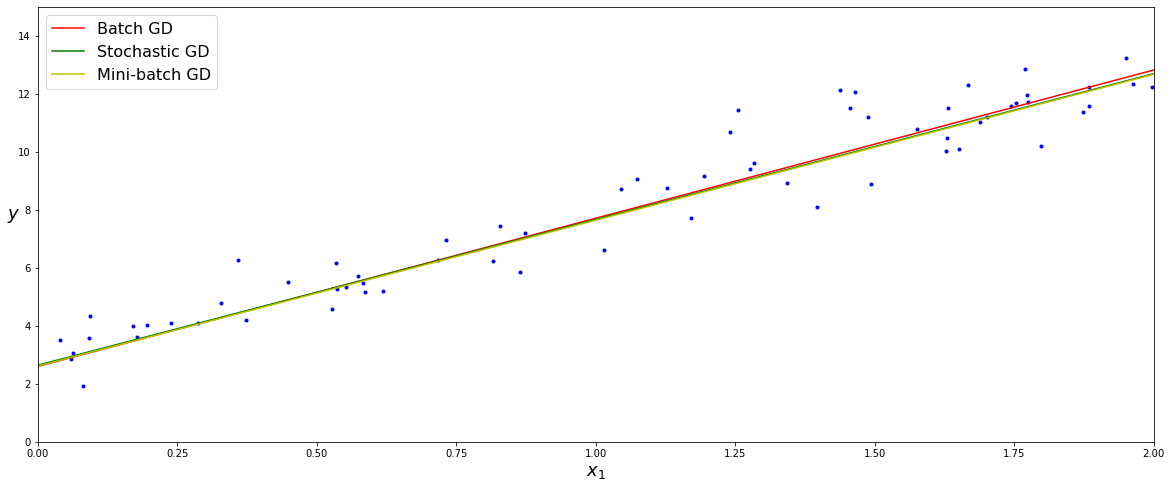

In [96]:
# Load Model's trained Parameters to plot it with the 
# Batch Model Parameters
W_batch = lm_batch.params['W']
b_batch = lm_batch.params['b']
# Stochastic Model Parameters
W_sto = lm_stochastic.params['W']
b_sto = lm_stochastic.params['b']
# Mini-batch Model Parameters
W_mini = lm_mini.params['W']
b_mini = lm_mini.params['b']
X_model = np.linspace(0, 2, 100).reshape(100, 1) # use X_model to plot the line "naturally" :)

plt.figure(figsize=(20, 8))
plt.plot(X, y, "b.")
plt.plot(X_model, W_batch*X_model + b_batch, c="r", ls='-', label='Batch GD')
plt.plot(X_model, W_sto*X_model + b_sto, c="g", ls='-', label='Stochastic GD')
plt.plot(X_model, W_mini*X_model + b_mini, c="y", ls='-', label='Mini-batch GD')


plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(fontsize=16)
plt.show()

# Conclusion

- This is just really simple Model I want to build to comprehend what I have learnt so far and understand everything from the ground.
- An easy one but "hard enough" to made me spent half of today building this :)
----
- Using 3 Different Gradient Descent Techniques, they are slightly different result but I guess with enough epochs for each, they will all converge to the optimal point (of course with enough epoch, Bacth 